# Cameron Thacker

## Usage of Spotify API to analyze artist's stats

In [84]:
## Downloading data

import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pprint import pprint
import pandas as pd
import sys
#sys.path.insert(0,"C:\\Users\\flyin\\Desktop\\spotify_project.py")

#import spotify_project as my_credentials


sns.set()

In [85]:
#Spotify API Credentials

CLIENT_ID = '91c3bac4aa194aa6b028041582c682b0'

CLIENT_SECRET = '819506bc31a949e1b88300bbf7f354df'

AUTH_URL = 'https://accounts.spotify.com/api/token'

#Post

auth_response = requests.post(AUTH_URL,{'grant_type': 'client_credentials',
                                        'client_id': CLIENT_ID,
                                        'client_secret': CLIENT_SECRET,
                                       })

#convert response to json

auth_response_data = auth_response.json()

# access token

access_token = auth_response_data['access_token']

headers = {
    
    'Authorization': 'Bearer {token}'.format(token = access_token)
    
}

BASE_URL = 'https://api.spotify.com/v1/'


#### data structure of audio features - Track ID

In [86]:
## Example with George Lopez

example_track_id = '3lJjySbUdugEbx3j3TM1Au'

new_req = requests.get(BASE_URL + "audio-features/" + example_track_id, headers = headers)

new_req = new_req.json()

pprint(new_req)

{'acousticness': 0.869,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3lJjySbUdugEbx3j3TM1Au',
 'danceability': 0.402,
 'duration_ms': 161627,
 'energy': 0.898,
 'id': '3lJjySbUdugEbx3j3TM1Au',
 'instrumentalness': 0.000389,
 'key': 4,
 'liveness': 0.885,
 'loudness': -13.47,
 'mode': 1,
 'speechiness': 0.884,
 'tempo': 116.032,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/3lJjySbUdugEbx3j3TM1Au',
 'type': 'audio_features',
 'uri': 'spotify:track:3lJjySbUdugEbx3j3TM1Au',
 'valence': 0.106}


### example of artist data structure

In [87]:
### Artist - George Lopez

artist_id = '6emrXi84Xjdb8YcEm82XEZ'

example_req = requests.get(BASE_URL + 'artists/' + artist_id, headers = headers)

json_result = example_req.json()

pprint(json_result)

{'external_urls': {'spotify': 'https://open.spotify.com/artist/6emrXi84Xjdb8YcEm82XEZ'},
 'followers': {'href': None, 'total': 43072},
 'genres': ['comedy', 'latino comedy'],
 'href': 'https://api.spotify.com/v1/artists/6emrXi84Xjdb8YcEm82XEZ',
 'id': '6emrXi84Xjdb8YcEm82XEZ',
 'images': [{'height': 720,
             'url': 'https://i.scdn.co/image/f9f9a33c5fd01943cac81c205d490150d3503c96',
             'width': 562},
            {'height': 256,
             'url': 'https://i.scdn.co/image/cfd0aadf2f0e91809f8a024a4a5855ded1ae2445',
             'width': 200},
            {'height': 82,
             'url': 'https://i.scdn.co/image/afd0de3560217fd874fa94dbbe8a7face5179f90',
             'width': 64}],
 'name': 'George Lopez',
 'popularity': 41,
 'type': 'artist',
 'uri': 'spotify:artist:6emrXi84Xjdb8YcEm82XEZ'}


### example data structure of artists albums

In [88]:
example_req = requests.get(BASE_URL + 'artists/' + artist_id + "/albums", headers = headers)

json_result = example_req.json()

album_list = []
detailed_album_list = []

for eachalbum in json_result['items']:
    pprint(eachalbum)
    if eachalbum['name'].split('(')[0].strip() in album_list:
        continue
    else:
        album_list.append(eachalbum['name'].split('(')[0].strip())
        detailed_album_list.append('{} ---- {}'.format(eachalbum['name'].split('(')[0].strip(),eachalbum['release_date']))
        



{'album_group': 'album',
 'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6emrXi84Xjdb8YcEm82XEZ'},
              'href': 'https://api.spotify.com/v1/artists/6emrXi84Xjdb8YcEm82XEZ',
              'id': '6emrXi84Xjdb8YcEm82XEZ',
              'name': 'George Lopez',
              'type': 'artist',
              'uri': 'spotify:artist:6emrXi84Xjdb8YcEm82XEZ'}],
 'available_markets': ['AU', 'NZ', 'US'],
 'external_urls': {'spotify': 'https://open.spotify.com/album/5WGWpHpb6FSzCreh8iy5kZ'},
 'href': 'https://api.spotify.com/v1/albums/5WGWpHpb6FSzCreh8iy5kZ',
 'id': '5WGWpHpb6FSzCreh8iy5kZ',
 'images': [{'height': 640,
             'url': 'https://i.scdn.co/image/ab67616d0000b273ca0f35a4a5c7be28c2f22a7e',
             'width': 640},
            {'height': 300,
             'url': 'https://i.scdn.co/image/ab67616d00001e02ca0f35a4a5c7be28c2f22a7e',
             'width': 300},
            {'height': 64,
             'url': 'https://i.scdn.co/

                       'UA',
                       'US',
                       'UY',
                       'VN',
                       'XK',
                       'ZA'],
 'external_urls': {'spotify': 'https://open.spotify.com/album/3oeOfJhLhBywyix4ikky4T'},
 'href': 'https://api.spotify.com/v1/albums/3oeOfJhLhBywyix4ikky4T',
 'id': '3oeOfJhLhBywyix4ikky4T',
 'images': [{'height': 640,
             'url': 'https://i.scdn.co/image/ab67616d0000b273add9076dc478e53565d90daa',
             'width': 640},
            {'height': 300,
             'url': 'https://i.scdn.co/image/ab67616d00001e02add9076dc478e53565d90daa',
             'width': 300},
            {'height': 64,
             'url': 'https://i.scdn.co/image/ab67616d00004851add9076dc478e53565d90daa',
             'width': 64}],
 'name': 'Team Leader',
 'release_date': '2003-06-03',
 'release_date_precision': 'day',
 'total_tracks': 19,
 'type': 'album',
 'uri': 'spotify:album:3oeOfJhLhBywyix4ikky4T'}
{'album_group': 'album',
 'a

                       'BR',
                       'BY',
                       'CA',
                       'CH',
                       'CL',
                       'CO',
                       'CR',
                       'CY',
                       'CZ',
                       'DE',
                       'DK',
                       'DO',
                       'DZ',
                       'EC',
                       'EE',
                       'EG',
                       'ES',
                       'FI',
                       'FR',
                       'GB',
                       'GR',
                       'GT',
                       'HK',
                       'HN',
                       'HR',
                       'HU',
                       'ID',
                       'IE',
                       'IL',
                       'IN',
                       'IS',
                       'IT',
                       'JO',
                       'JP',
              

             'url': 'https://i.scdn.co/image/ab67616d00001e02c23d93f03e2f7e4ae720ebb3',
             'width': 300},
            {'height': 64,
             'url': 'https://i.scdn.co/image/ab67616d00004851c23d93f03e2f7e4ae720ebb3',
             'width': 64}],
 'name': 'Go Loco (Clean)',
 'release_date': '2011-05-23',
 'release_date_precision': 'day',
 'total_tracks': 1,
 'type': 'album',
 'uri': 'spotify:album:180av4RJwvRuubK9mueEn7'}
{'album_group': 'appears_on',
 'album_type': 'compilation',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'},
              'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of',
              'id': '0LyfQWJT6nXafLPZqxe9Of',
              'name': 'Various Artists',
              'type': 'artist',
              'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}],
 'available_markets': ['CA', 'US'],
 'external_urls': {'spotify': 'https://open.spotify.com/album/08a2YQK74YrxNclLmOrZF4'},
 'href': '

### example data structure of how to get tracks from albums

In [89]:
george_lopez_danceability = []
george_lopez_energy = []
george_lopez_speechiness = []
data = []

for eachalbum in json_result['items']:
    
    album_name = eachalbum['name']
    trim_album_name = eachalbum['name'].split('(')[0].strip()
    release_date = eachalbum['release_date']
    album_id = eachalbum['id']
    
    request_tracks = requests.get(BASE_URL + 'albums/' + eachalbum['id'] + '/tracks', headers = headers).json()['items']
    for eachtrack in request_tracks:
        
        request_audio_features = requests.get(BASE_URL + 'audio-features/' + eachtrack['id'], headers = headers).json()
        pprint(request_audio_features)
        
        request_audio_features.update({
            'track_name': eachtrack['name'],
            'album_name': album_name,
            'short_album_name': trim_album_name,
            'release_date': release_date,
            'album_id': album_id
        })
        
        data.append(request_audio_features)
        george_lopez_danceability.append(request_audio_features['danceability'])
        george_lopez_energy.append(request_audio_features['energy'])
        george_lopez_speechiness.append(request_audio_features['speechiness'])
        

{'acousticness': 0.856,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4vlMgFYj5kBlZf4NKLK8vh',
 'danceability': 0.277,
 'duration_ms': 150616,
 'energy': 0.889,
 'id': '4vlMgFYj5kBlZf4NKLK8vh',
 'instrumentalness': 4.98e-05,
 'key': 4,
 'liveness': 0.93,
 'loudness': -11.159,
 'mode': 0,
 'speechiness': 0.416,
 'tempo': 103.479,
 'time_signature': 3,
 'track_href': 'https://api.spotify.com/v1/tracks/4vlMgFYj5kBlZf4NKLK8vh',
 'type': 'audio_features',
 'uri': 'spotify:track:4vlMgFYj5kBlZf4NKLK8vh',
 'valence': 0.0453}
{'acousticness': 0.757,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4z92CYq4ljWeHV78WblTsc',
 'danceability': 0.348,
 'duration_ms': 127141,
 'energy': 0.949,
 'id': '4z92CYq4ljWeHV78WblTsc',
 'instrumentalness': 0,
 'key': 1,
 'liveness': 0.936,
 'loudness': -11.83,
 'mode': 1,
 'speechiness': 0.807,
 'tempo': 177.055,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/4z92CYq4ljWeHV78WblTsc',
 'type': 'audio_features',
 

{'acousticness': 0.834,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5uhOQq8WcNmpgV7NLZGHl3',
 'danceability': 0.513,
 'duration_ms': 152349,
 'energy': 0.829,
 'id': '5uhOQq8WcNmpgV7NLZGHl3',
 'instrumentalness': 1.65e-06,
 'key': 2,
 'liveness': 0.93,
 'loudness': -15.068,
 'mode': 1,
 'speechiness': 0.901,
 'tempo': 59.953,
 'time_signature': 3,
 'track_href': 'https://api.spotify.com/v1/tracks/5uhOQq8WcNmpgV7NLZGHl3',
 'type': 'audio_features',
 'uri': 'spotify:track:5uhOQq8WcNmpgV7NLZGHl3',
 'valence': 0.0685}
{'acousticness': 0.78,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5rKktNZK5OdDpl2ueYplQw',
 'danceability': 0.439,
 'duration_ms': 182574,
 'energy': 0.837,
 'id': '5rKktNZK5OdDpl2ueYplQw',
 'instrumentalness': 5.84e-06,
 'key': 1,
 'liveness': 0.933,
 'loudness': -15.64,
 'mode': 1,
 'speechiness': 0.864,
 'tempo': 84.4,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/5rKktNZK5OdDpl2ueYplQw',
 'type': 'audio_features',

{'acousticness': 0.852,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6ONU8sALbCITIpqh2O1llI',
 'danceability': 0.413,
 'duration_ms': 521187,
 'energy': 0.981,
 'id': '6ONU8sALbCITIpqh2O1llI',
 'instrumentalness': 2.01e-05,
 'key': 5,
 'liveness': 0.349,
 'loudness': -6.18,
 'mode': 1,
 'speechiness': 0.832,
 'tempo': 113.856,
 'time_signature': 5,
 'track_href': 'https://api.spotify.com/v1/tracks/6ONU8sALbCITIpqh2O1llI',
 'type': 'audio_features',
 'uri': 'spotify:track:6ONU8sALbCITIpqh2O1llI',
 'valence': 0.0377}
{'acousticness': 0.758,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/04igbJAQmw25gOXqSGJ9St',
 'danceability': 0.361,
 'duration_ms': 315760,
 'energy': 0.988,
 'id': '04igbJAQmw25gOXqSGJ9St',
 'instrumentalness': 0.0196,
 'key': 7,
 'liveness': 0.971,
 'loudness': -6.864,
 'mode': 1,
 'speechiness': 0.738,
 'tempo': 92.155,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/04igbJAQmw25gOXqSGJ9St',
 'type': 'audio_features'

{'acousticness': 0.821,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3yp9UUMiwHq3grl2Zmo8O0',
 'danceability': 0.404,
 'duration_ms': 281307,
 'energy': 0.872,
 'id': '3yp9UUMiwHq3grl2Zmo8O0',
 'instrumentalness': 8.69e-06,
 'key': 6,
 'liveness': 0.894,
 'loudness': -9.945,
 'mode': 0,
 'speechiness': 0.927,
 'tempo': 154.239,
 'time_signature': 5,
 'track_href': 'https://api.spotify.com/v1/tracks/3yp9UUMiwHq3grl2Zmo8O0',
 'type': 'audio_features',
 'uri': 'spotify:track:3yp9UUMiwHq3grl2Zmo8O0',
 'valence': 0.0794}
{'acousticness': 0.708,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/71RzLzADIAwt1G4g2PStss',
 'danceability': 0.325,
 'duration_ms': 248013,
 'energy': 0.956,
 'id': '71RzLzADIAwt1G4g2PStss',
 'instrumentalness': 0.000197,
 'key': 5,
 'liveness': 0.259,
 'loudness': -8.173,
 'mode': 0,
 'speechiness': 0.81,
 'tempo': 169.369,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/71RzLzADIAwt1G4g2PStss',
 'type': 'audio_featur

{'acousticness': 0.863,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7jPxzla96lP7yPzMkLZx3y',
 'danceability': 0.349,
 'duration_ms': 215853,
 'energy': 0.866,
 'id': '7jPxzla96lP7yPzMkLZx3y',
 'instrumentalness': 1.9e-05,
 'key': 3,
 'liveness': 0.911,
 'loudness': -13.594,
 'mode': 1,
 'speechiness': 0.938,
 'tempo': 73.779,
 'time_signature': 3,
 'track_href': 'https://api.spotify.com/v1/tracks/7jPxzla96lP7yPzMkLZx3y',
 'type': 'audio_features',
 'uri': 'spotify:track:7jPxzla96lP7yPzMkLZx3y',
 'valence': 0.11}
{'acousticness': 0.839,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1A9LTpF1lXbsXOT2LP7JdK',
 'danceability': 0.365,
 'duration_ms': 181587,
 'energy': 0.856,
 'id': '1A9LTpF1lXbsXOT2LP7JdK',
 'instrumentalness': 1.47e-05,
 'key': 1,
 'liveness': 0.957,
 'loudness': -14.543,
 'mode': 0,
 'speechiness': 0.922,
 'tempo': 76.634,
 'time_signature': 3,
 'track_href': 'https://api.spotify.com/v1/tracks/1A9LTpF1lXbsXOT2LP7JdK',
 'type': 'audio_features

 'instrumentalness': 1.27e-05,
 'key': 2,
 'liveness': 0.907,
 'loudness': -13.796,
 'mode': 1,
 'speechiness': 0.88,
 'tempo': 83.75,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/4FeGktUWYQ3OOs7LNMuBzp',
 'type': 'audio_features',
 'uri': 'spotify:track:4FeGktUWYQ3OOs7LNMuBzp',
 'valence': 0.146}
{'acousticness': 0.83,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/47eYEE0RjKn0gPJKV1U2FW',
 'danceability': 0.369,
 'duration_ms': 181080,
 'energy': 0.806,
 'id': '47eYEE0RjKn0gPJKV1U2FW',
 'instrumentalness': 1.33e-05,
 'key': 7,
 'liveness': 0.959,
 'loudness': -14.705,
 'mode': 0,
 'speechiness': 0.904,
 'tempo': 78.118,
 'time_signature': 3,
 'track_href': 'https://api.spotify.com/v1/tracks/47eYEE0RjKn0gPJKV1U2FW',
 'type': 'audio_features',
 'uri': 'spotify:track:47eYEE0RjKn0gPJKV1U2FW',
 'valence': 0.125}
{'acousticness': 0.874,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2OMooUKKbI7rLL0cv9Isja',
 'danceability': 0.422,
 'dura

 'duration_ms': 260840,
 'energy': 0.736,
 'id': '5OadnkRrUIQNWG5uUcm9Ep',
 'instrumentalness': 0,
 'key': 10,
 'liveness': 0.914,
 'loudness': -14.317,
 'mode': 1,
 'speechiness': 0.935,
 'tempo': 140.804,
 'time_signature': 3,
 'track_href': 'https://api.spotify.com/v1/tracks/5OadnkRrUIQNWG5uUcm9Ep',
 'type': 'audio_features',
 'uri': 'spotify:track:5OadnkRrUIQNWG5uUcm9Ep',
 'valence': 0.347}
{'acousticness': 0.877,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4bLlJzwP7AGBBXlogarTg3',
 'danceability': 0.456,
 'duration_ms': 321093,
 'energy': 0.612,
 'id': '4bLlJzwP7AGBBXlogarTg3',
 'instrumentalness': 1.3e-06,
 'key': 5,
 'liveness': 0.775,
 'loudness': -15.602,
 'mode': 1,
 'speechiness': 0.923,
 'tempo': 96.426,
 'time_signature': 5,
 'track_href': 'https://api.spotify.com/v1/tracks/4bLlJzwP7AGBBXlogarTg3',
 'type': 'audio_features',
 'uri': 'spotify:track:4bLlJzwP7AGBBXlogarTg3',
 'valence': 0.355}
{'acousticness': 0.855,
 'analysis_url': 'https://api.spotify.com/v

{'acousticness': 0.841,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0ISu5SZHrEFqCoVDHswsWO',
 'danceability': 0.39,
 'duration_ms': 105187,
 'energy': 0.688,
 'id': '0ISu5SZHrEFqCoVDHswsWO',
 'instrumentalness': 0,
 'key': 4,
 'liveness': 0.85,
 'loudness': -13.497,
 'mode': 0,
 'speechiness': 0.918,
 'tempo': 54.855,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/0ISu5SZHrEFqCoVDHswsWO',
 'type': 'audio_features',
 'uri': 'spotify:track:0ISu5SZHrEFqCoVDHswsWO',
 'valence': 0.472}
{'acousticness': 0.855,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5akbZFX95wr5dTiRsPpkZy',
 'danceability': 0.548,
 'duration_ms': 142120,
 'energy': 0.745,
 'id': '5akbZFX95wr5dTiRsPpkZy',
 'instrumentalness': 5.04e-06,
 'key': 11,
 'liveness': 0.92,
 'loudness': -12.583,
 'mode': 1,
 'speechiness': 0.92,
 'tempo': 65.171,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/5akbZFX95wr5dTiRsPpkZy',
 'type': 'audio_features',
 'uri

{'acousticness': 0.819,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7tqucAz7ReSKtstpP93bSS',
 'danceability': 0.407,
 'duration_ms': 224080,
 'energy': 0.395,
 'id': '7tqucAz7ReSKtstpP93bSS',
 'instrumentalness': 0,
 'key': 0,
 'liveness': 0.904,
 'loudness': -17.989,
 'mode': 1,
 'speechiness': 0.928,
 'tempo': 47.479,
 'time_signature': 3,
 'track_href': 'https://api.spotify.com/v1/tracks/7tqucAz7ReSKtstpP93bSS',
 'type': 'audio_features',
 'uri': 'spotify:track:7tqucAz7ReSKtstpP93bSS',
 'valence': 0.399}
{'acousticness': 0.835,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5MBVedeTdYUozXoE1UqCvp',
 'danceability': 0.405,
 'duration_ms': 117560,
 'energy': 0.845,
 'id': '5MBVedeTdYUozXoE1UqCvp',
 'instrumentalness': 1.25e-06,
 'key': 9,
 'liveness': 0.976,
 'loudness': -11.07,
 'mode': 1,
 'speechiness': 0.896,
 'tempo': 56.398,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/5MBVedeTdYUozXoE1UqCvp',
 'type': 'audio_features',
 'u

 'mode': 1,
 'speechiness': 0.938,
 'tempo': 70.131,
 'time_signature': 3,
 'track_href': 'https://api.spotify.com/v1/tracks/7dj66WYwAdDrje4cOo8S3O',
 'type': 'audio_features',
 'uri': 'spotify:track:7dj66WYwAdDrje4cOo8S3O',
 'valence': 0.552}
{'acousticness': 0.832,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1fSJsvjr1oXHIO8E7XcSbu',
 'danceability': 0.517,
 'duration_ms': 166027,
 'energy': 0.769,
 'id': '1fSJsvjr1oXHIO8E7XcSbu',
 'instrumentalness': 1.81e-06,
 'key': 1,
 'liveness': 0.909,
 'loudness': -12.114,
 'mode': 1,
 'speechiness': 0.944,
 'tempo': 86.226,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/1fSJsvjr1oXHIO8E7XcSbu',
 'type': 'audio_features',
 'uri': 'spotify:track:1fSJsvjr1oXHIO8E7XcSbu',
 'valence': 0.424}
{'acousticness': 0.88,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/66T8TiuRJIlYlsbmDjwdJE',
 'danceability': 0.465,
 'duration_ms': 453800,
 'energy': 0.548,
 'id': '66T8TiuRJIlYlsbmDjwdJE',
 'instrumenta

{'acousticness': 0.867,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1F0rVJZ3qQAsZE3vsZ3wGR',
 'danceability': 0.526,
 'duration_ms': 251786,
 'energy': 0.583,
 'id': '1F0rVJZ3qQAsZE3vsZ3wGR',
 'instrumentalness': 0,
 'key': 3,
 'liveness': 0.807,
 'loudness': -21.213,
 'mode': 0,
 'speechiness': 0.946,
 'tempo': 103.393,
 'time_signature': 5,
 'track_href': 'https://api.spotify.com/v1/tracks/1F0rVJZ3qQAsZE3vsZ3wGR',
 'type': 'audio_features',
 'uri': 'spotify:track:1F0rVJZ3qQAsZE3vsZ3wGR',
 'valence': 0.0977}
{'acousticness': 0.798,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1D34EEZR0xpXxwxJiQAyhh',
 'danceability': 0.497,
 'duration_ms': 225001,
 'energy': 0.783,
 'id': '1D34EEZR0xpXxwxJiQAyhh',
 'instrumentalness': 0,
 'key': 3,
 'liveness': 0.823,
 'loudness': -19.587,
 'mode': 0,
 'speechiness': 0.932,
 'tempo': 78.339,
 'time_signature': 1,
 'track_href': 'https://api.spotify.com/v1/tracks/1D34EEZR0xpXxwxJiQAyhh',
 'type': 'audio_features',
 'uri':

{'acousticness': 0.0063,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4yVwPPLlRBsFEX1SDecDu8',
 'danceability': 0,
 'duration_ms': 4320,
 'energy': 0.414,
 'id': '4yVwPPLlRBsFEX1SDecDu8',
 'instrumentalness': 0.000437,
 'key': 7,
 'liveness': 0,
 'loudness': -10.544,
 'mode': 1,
 'speechiness': 0,
 'tempo': 0,
 'time_signature': 0,
 'track_href': 'https://api.spotify.com/v1/tracks/4yVwPPLlRBsFEX1SDecDu8',
 'type': 'audio_features',
 'uri': 'spotify:track:4yVwPPLlRBsFEX1SDecDu8',
 'valence': 0}
{'acousticness': 0.245,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6HjW1ET1eyVERDBhCi30HC',
 'danceability': 0.715,
 'duration_ms': 330613,
 'energy': 0.735,
 'id': '6HjW1ET1eyVERDBhCi30HC',
 'instrumentalness': 0.565,
 'key': 11,
 'liveness': 0.223,
 'loudness': -8.46,
 'mode': 0,
 'speechiness': 0.0298,
 'tempo': 120.03,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/6HjW1ET1eyVERDBhCi30HC',
 'type': 'audio_features',
 'uri': 'spotify:tra

{'acousticness': 0.0918,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5GIOVqIKYNTNWSngS9gzy2',
 'danceability': 0.527,
 'duration_ms': 384600,
 'energy': 0.781,
 'id': '5GIOVqIKYNTNWSngS9gzy2',
 'instrumentalness': 0.423,
 'key': 0,
 'liveness': 0.342,
 'loudness': -7.573,
 'mode': 1,
 'speechiness': 0.0675,
 'tempo': 173.986,
 'time_signature': 3,
 'track_href': 'https://api.spotify.com/v1/tracks/5GIOVqIKYNTNWSngS9gzy2',
 'type': 'audio_features',
 'uri': 'spotify:track:5GIOVqIKYNTNWSngS9gzy2',
 'valence': 0.522}
{'acousticness': 0.569,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1CWW6APq6JTrlFXwUfgNEq',
 'danceability': 0.556,
 'duration_ms': 131773,
 'energy': 0.215,
 'id': '1CWW6APq6JTrlFXwUfgNEq',
 'instrumentalness': 0,
 'key': 9,
 'liveness': 0.109,
 'loudness': -16.619,
 'mode': 0,
 'speechiness': 0.107,
 'tempo': 118.312,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/1CWW6APq6JTrlFXwUfgNEq',
 'type': 'audio_features',
 '

{'acousticness': 0.52,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/55NJgOC1k3hMF9SqTX1oXu',
 'danceability': 0.701,
 'duration_ms': 216333,
 'energy': 0.829,
 'id': '55NJgOC1k3hMF9SqTX1oXu',
 'instrumentalness': 0,
 'key': 6,
 'liveness': 0.385,
 'loudness': -4.738,
 'mode': 0,
 'speechiness': 0.0363,
 'tempo': 137.945,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/55NJgOC1k3hMF9SqTX1oXu',
 'type': 'audio_features',
 'uri': 'spotify:track:55NJgOC1k3hMF9SqTX1oXu',
 'valence': 0.84}
{'acousticness': 0.376,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2S0ry3UCN0vn6BmGGE5Egt',
 'danceability': 0.736,
 'duration_ms': 252547,
 'energy': 0.762,
 'id': '2S0ry3UCN0vn6BmGGE5Egt',
 'instrumentalness': 0,
 'key': 1,
 'liveness': 0.102,
 'loudness': -5.679,
 'mode': 1,
 'speechiness': 0.0587,
 'tempo': 132.922,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/2S0ry3UCN0vn6BmGGE5Egt',
 'type': 'audio_features',
 'uri': '

{'acousticness': 0.192,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0RfgRxriJ9CzdoDkuu90ow',
 'danceability': 0.697,
 'duration_ms': 181707,
 'energy': 0.942,
 'id': '0RfgRxriJ9CzdoDkuu90ow',
 'instrumentalness': 0.00816,
 'key': 0,
 'liveness': 0.12,
 'loudness': -6.334,
 'mode': 0,
 'speechiness': 0.0594,
 'tempo': 126.041,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/0RfgRxriJ9CzdoDkuu90ow',
 'type': 'audio_features',
 'uri': 'spotify:track:0RfgRxriJ9CzdoDkuu90ow',
 'valence': 0.907}
{'acousticness': 0.0389,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4tvW0s7FJlruleKMlO24rH',
 'danceability': 0.314,
 'duration_ms': 166693,
 'energy': 0.822,
 'id': '4tvW0s7FJlruleKMlO24rH',
 'instrumentalness': 0,
 'key': 5,
 'liveness': 0.278,
 'loudness': -7.596,
 'mode': 1,
 'speechiness': 0.128,
 'tempo': 144.067,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/4tvW0s7FJlruleKMlO24rH',
 'type': 'audio_features',
 '

{'acousticness': 0.641,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2PrKDQCdYnzVDMisJbPOLR',
 'danceability': 0.56,
 'duration_ms': 140333,
 'energy': 0.664,
 'id': '2PrKDQCdYnzVDMisJbPOLR',
 'instrumentalness': 0.949,
 'key': 0,
 'liveness': 0.121,
 'loudness': -9.144,
 'mode': 1,
 'speechiness': 0.0297,
 'tempo': 97.769,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/2PrKDQCdYnzVDMisJbPOLR',
 'type': 'audio_features',
 'uri': 'spotify:track:2PrKDQCdYnzVDMisJbPOLR',
 'valence': 0.844}
{'acousticness': 0.198,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1XgcibT69QAzjf38uPkJWm',
 'danceability': 0.525,
 'duration_ms': 227947,
 'energy': 0.718,
 'id': '1XgcibT69QAzjf38uPkJWm',
 'instrumentalness': 0,
 'key': 11,
 'liveness': 0.298,
 'loudness': -9.065,
 'mode': 0,
 'speechiness': 0.363,
 'tempo': 141.558,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/1XgcibT69QAzjf38uPkJWm',
 'type': 'audio_features',
 'uri

{'acousticness': 0.0906,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6RDfnXi9PEjTzMmYwu3hYs',
 'danceability': 0.673,
 'duration_ms': 114227,
 'energy': 0.697,
 'id': '6RDfnXi9PEjTzMmYwu3hYs',
 'instrumentalness': 0,
 'key': 11,
 'liveness': 0.164,
 'loudness': -8.698,
 'mode': 0,
 'speechiness': 0.0397,
 'tempo': 96.002,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/6RDfnXi9PEjTzMmYwu3hYs',
 'type': 'audio_features',
 'uri': 'spotify:track:6RDfnXi9PEjTzMmYwu3hYs',
 'valence': 0.488}
{'acousticness': 0.694,
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2b22i1y7yDZDhj0JgY3v7a',
 'danceability': 0.517,
 'duration_ms': 164200,
 'energy': 0.647,
 'id': '2b22i1y7yDZDhj0JgY3v7a',
 'instrumentalness': 0.000112,
 'key': 5,
 'liveness': 0.21,
 'loudness': -8.076,
 'mode': 0,
 'speechiness': 0.0404,
 'tempo': 94.734,
 'time_signature': 4,
 'track_href': 'https://api.spotify.com/v1/tracks/2b22i1y7yDZDhj0JgY3v7a',
 'type': 'audio_features',
 

### George Lopez Danceability

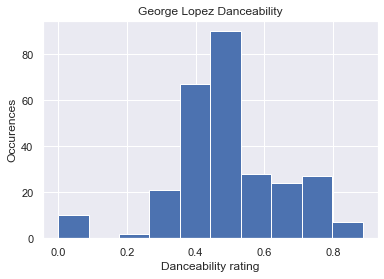

In [90]:
plt.hist(george_lopez_danceability)
plt.xlabel("Danceability rating")
plt.ylabel("Occurences")
plt.title("George Lopez Danceability")
plt.show()

### George Lopez Energy

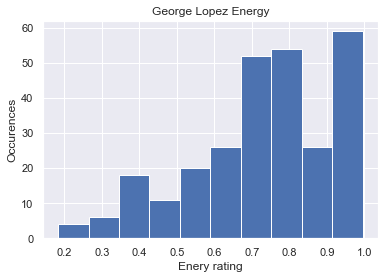

In [91]:
plt.hist(george_lopez_energy)
plt.xlabel("Enery rating")
plt.ylabel("Occurences")
plt.title("George Lopez Energy")
plt.show()

### George Lopez Speechiness

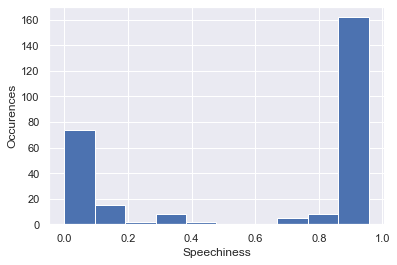

In [92]:
plt.hist(george_lopez_speechiness)
plt.xlabel("Speechiness")
plt.ylabel("Occurences")
plt.show()

In [93]:
### convert data to datafram with pandas


df = pd.DataFrame(data)

df['release_date'] = pd.to_datetime(df['release_date'])

df = df.sort_values(by = 'release_date')

pprint(df.head())


     danceability  energy  key  loudness  mode  speechiness  acousticness  \
137         0.457   0.677    9   -14.713     0        0.943         0.844   
132         0.405   0.845    9   -11.070     1        0.896         0.835   
133         0.460   0.871    3   -12.789     1        0.938         0.743   
134         0.452   0.737    5   -13.709     1        0.939         0.830   
135         0.495   0.713    4   -14.177     0        0.929         0.843   

     instrumentalness  liveness  valence  ...  \
137          0.000000     0.851    0.331  ...   
132          0.000001     0.976    0.353  ...   
133          0.000000     0.917    0.270  ...   
134          0.000000     0.954    0.310  ...   
135          0.000000     0.907    0.245  ...   

                                      uri  \
137  spotify:track:2aHG0c7AxPlZHT5PhAKZJr   
132  spotify:track:5MBVedeTdYUozXoE1UqCvp   
133  spotify:track:5KQsBnzO81y8o2tewz9aQr   
134  spotify:track:4dRGol6WiIQVIFSPne7wLD   
135  spotify:trac

### Plot some data from the datasets | Valence vs Acousticness

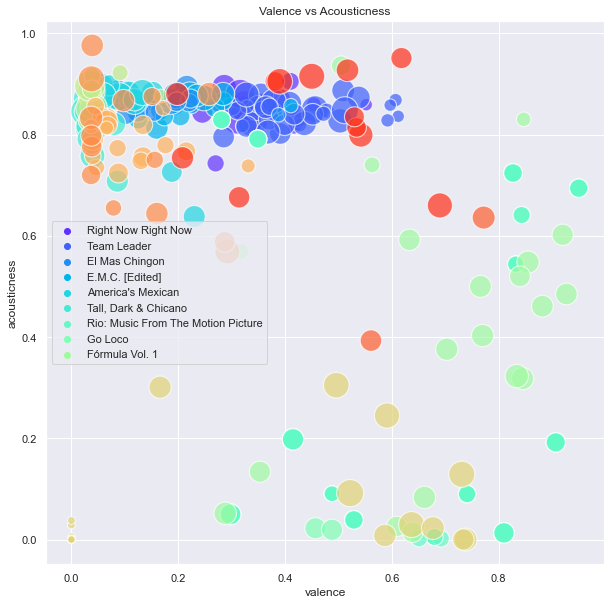

In [94]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data = df, x = 'valence', y = 'acousticness', hue = 'short_album_name', palette = 'rainbow', 
                    size = 'duration_ms', sizes = (50,1000), alpha = 0.7)

plt.title("Valence vs Acousticness")

#display legend without 'size' attribute

h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:10],labs[1:10],loc = 'best',title = None)

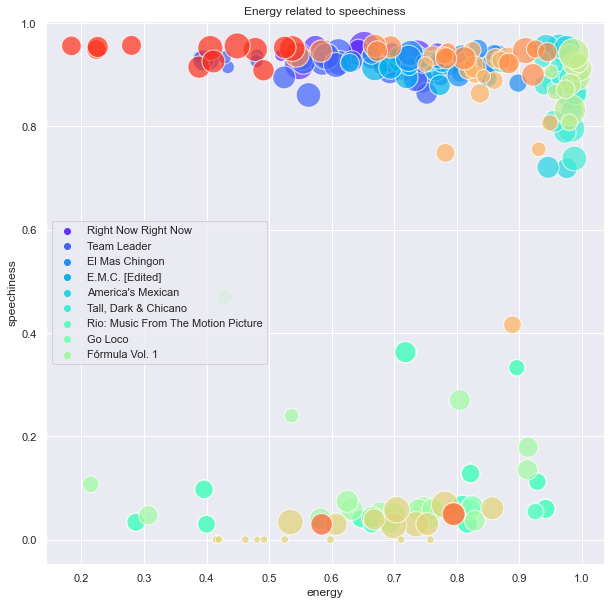

In [95]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data = df, x = 'energy', y = 'speechiness', hue = 'short_album_name', palette = 'rainbow',
                    size = 'duration_ms', sizes = (50,1000), alpha = 0.7)

plt.title("Energy related to speechiness")

h,labs = ax.get_legend_handles_labels()

ax.legend(h[1:10],labs[1:10],loc = 'best',title = None)

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
5         0.263   0.983    2    -9.668     1        0.796         0.871   
4         0.297   0.984    4    -8.903     0        0.865         0.846   
0         0.464   0.982    7    -7.155     1        0.882         0.854   
8         0.366   0.960    6    -8.576     0        0.887         0.841   
2         0.420   0.995    1    -4.527     1        0.913         0.885   

   instrumentalness  liveness  valence  ...            type  \
5          0.009040     0.731   0.0289  ...  audio_features   
4          0.000930     0.947   0.0287  ...  audio_features   
0          0.000005     0.781   0.0354  ...  audio_features   
8          0.000123     0.934   0.0350  ...  audio_features   
2          0.000003     0.995   0.0382  ...  audio_features   

                       id                                   uri  \
5  0JfhEqfjZVKy4mvAQfwMEd  spotify:track:0JfhEqfjZVKy4mvAQfwMEd   
4  2Nwux3vxe2EwKJFc3yt8A7  spotify:t

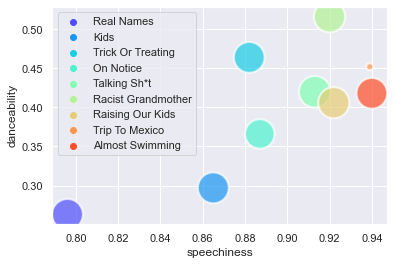

In [150]:
### getting George Lopez's top tracks

speechiness_of_top_tracks = []
data = []

top_tracks_req = requests.get(BASE_URL + 'artists/' + artist_id + '/top-tracks?country=US', headers = headers).json()
for eachtrack in top_tracks_req['tracks']:
    if eachtrack['album']['album_type'] != 'album':
        continue
    album_name = eachtrack['album']['name']
    track_name = eachtrack['name']
    each_track_id = eachtrack['id']
    song_details = requests.get(BASE_URL + 'audio-features/' + each_track_id, headers = headers).json()
    song_details.update({
        'track_name': track_name,
        'album_name': album_name,
        'track_id': each_track_id 
    })
    data.append(song_details)

dataFrame = pd.DataFrame(data)

dataFrame = dataFrame.sort_values(by = 'speechiness')

pprint(dataFrame.head())

ax = sns.scatterplot(data = dataFrame, x = 'speechiness', y = 'danceability', hue = 'track_name', palette = 'rainbow',
                    size = 'energy', sizes = (50,1000), alpha = 0.7)

h,labs = ax.get_legend_handles_labels()

ax.legend(h[1:10],labs[1:10],loc = 'best',title = None)

In [124]:
!pip install seaborn

You should consider upgrading via the 'c:\users\flyin\appdata\local\programs\thonny\python.exe -m pip install --upgrade pip' command.
